In [27]:
import seaborn as sns
from pycocotools import coco

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import math


In [4]:


TRAIN_PARTS_PATH = ["data/coco/parts/annotations/0_train.json", 
             "data/coco/parts/annotations/1_train.json",
             "data/coco/parts/annotations/2_train.json",
             "data/coco/annotations/instances_train2017.json"]

VAL_PARTS_PATH = ["data/coco/parts/annotations/0_val.json", 
             "data/coco/parts/annotations/1_val.json",
             "data/coco/parts/annotations/2_val.json",
             "data/coco/annotations/instances_val2017.json"]

In [5]:
def get_all_statistics(PATH):
    tmp_coco = coco.COCO(PATH)
    annotations = tmp_coco.anns
    N_annatotions = len(annotations)

    images = tmp_coco.getImgIds()
    N_images = len(images)

    categories = tmp_coco.cats
    categories_names = {idx: cat["name"] for idx, cat in categories.items()}
    N_categories  = len(categories)

    cats_to_anns= {name: tmp_coco.getAnnIds(catIds=[idx]) for idx, name in categories_names.items()}
    cats_to_anns_lens = {name: len(ann_idx) for name, ann_idx in cats_to_anns.items()}
    return N_annatotions, N_images, N_categories,categories_names, cats_to_anns_lens

In [6]:
def get_annotation_of_all_dataset(PARTS_PATH):
    n_ann, n_img, n_cat, cats_name, all_cats_to_anns_lens = [], [], [], [], []
    #df = {"Number of images": [] , "Number of catergories": [], "Number of instances": []}
    for path in PARTS_PATH:
        N_annatotions, N_images, N_categories,categories_names, cats_to_anns_lens = get_all_statistics(path)
        n_ann.append(N_annatotions) 
        n_img.append(N_images)
        n_cat.append(N_categories)
        cats_name.append(categories_names)
        all_cats_to_anns_lens.append(cats_to_anns_lens)
    return  n_ann, n_img, n_cat, cats_name, all_cats_to_anns_lens 

In [7]:
def draw_barplot(y, y_title, title, save_path):
    fig, ax = plt.subplots(figsize=(10,5))
    x = ["coco_part_0","coco_part_1", "coco_part_2" ]
    sns.barplot(x=x, y=y, palette="rocket", ax=ax)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_ylabel(y_title)
    ax.set_xlabel("Datasets")
    ax.set_title(title)
    plt.savefig("images/coco_parts_dataset_review/" + save_path)


In [ ]:
#draw_barplot(n_img,"Number of images",  "Number of images in each dataset", "n_images")


In [ ]:
#draw_barplot(n_cat,"Number of categories",  "Number of categories in each dataset", "n_cats")


In [ ]:
#draw_barplot(n_ann,"Number of annotations",  "Number of annotations in each dataset", "n_ann")


In [9]:
def get_df_stats(n_img, n_cat, n_ann):
    df = {}
    df["Number of images"] = n_img
    df["Number of catergories"] = n_cat
    df[ "Number of instances"] = n_ann
    #df["Datasets"] = [os.path.basename(path) for path in PART_PATH]
    df = pd.DataFrame(df, index=["coco_part_0","coco_part_1", "coco_part_2", "coco"])#[os.path.basename(path).split(".json")[0] for path in PART_PATH])
    return df

In [10]:
 n_ann, n_img, n_cat, cats_name, all_cats_to_anns_lens= get_annotation_of_all_dataset(TRAIN_PARTS_PATH)

loading annotations into memory...
Done (t=2.37s)
creating index...
index created!
loading annotations into memory...
Done (t=2.46s)
creating index...
index created!
loading annotations into memory...
Done (t=2.22s)
creating index...
index created!
loading annotations into memory...
Done (t=13.29s)
creating index...
index created!


In [11]:
get_df_stats(n_img, n_cat, n_ann)

,Number of images,Number of catergories,Number of instances
coco_part_0,43558,39,144135
coco_part_1,46315,40,164325
coco_part_2,27393,1,108806
coco,118287,80,860001


In [14]:
 val_n_ann, val_n_img, val_n_cat, val_cats_name, val_all_cats_to_anns_lens= get_annotation_of_all_dataset(VAL_PARTS_PATH)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.56s)
creating index...
index created!


In [15]:
get_df_stats(val_n_img, val_n_cat, val_n_ann)

,Number of images,Number of catergories,Number of instances
coco_part_0,1864,39,6200
coco_part_1,1938,40,6911
coco_part_2,1150,1,4500
coco,5000,80,36781


# Checking number of images used in coco

In [ ]:
tmp_coco = coco.COCO("data/coco/annotations/instances_train2017.json")
anns = tmp_coco.anns


In [ ]:
images = [ann["image_id"] for ann in anns.values()]

In [ ]:
len(images), len(set(images)), len(set([img["file_name"] for img in tmp_coco.imgs.values()]))

# Categories in the dataset

In [16]:
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.max_rows', 100000)
pd.set_option('max_colwidth', 100000)

In [18]:
df = {}
df["Categories"] = [cat_name.values() for cat_name in cats_name]
df = pd.DataFrame(df, index=["coco_part_0","coco_part_1", "coco_part_2","coco"] )#[os.path.basename(path).split(".json")[0] for path in PART_PATH])

In [21]:
#print(df.to_latex(bold_rows=True))
df

,Categories
coco_part_0,"(motorcycle, airplane, bus, train, boat, traffic light, bench, horse, elephant, bear, umbrella, frisbee, skis, baseball bat, baseball glove, bottle, wine glass, fork, knife, spoon, banana, pizza, donut, cake, chair, couch, potted plant, bed, dining table, laptop, mouse, keyboard, cell phone, microwave, toaster, sink, clock, teddy bear, toothbrush)"
coco_part_1,"(bicycle, car, truck, fire hydrant, stop sign, parking meter, bird, cat, dog, sheep, cow, zebra, giraffe, backpack, handbag, tie, suitcase, snowboard, sports ball, kite, skateboard, surfboard, tennis racket, cup, bowl, apple, sandwich, orange, broccoli, carrot, hot dog, toilet, tv, remote, oven, refrigerator, book, vase, scissors, hair drier)"
coco_part_2,(person)
coco,"(person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush)"


# Categories distribution in the datasets

In [22]:
def get_cats_ann_clrs_ds_diff(all_cats_to_anns_lens):
    cats, anns, clrs, ds, diff = [], [], [], [], []
    datasets = ["coco_part_0","coco_part_1", "coco_part_2", "coco"]
    colors =["violet", "red", "orange"]
    for idx, cats_to_anns_lens in enumerate(all_cats_to_anns_lens[:-1]):
        for key,value in cats_to_anns_lens.items():
            cats.append(key)
            anns.append(value)
            diff.append(all_cats_to_anns_lens[-1][key])
        clrs = np.append(clrs, [idx]*len(cats_to_anns_lens))
        ds = np.append(ds, [datasets[idx]]*len(cats_to_anns_lens))
    return cats, anns, clrs, ds, diff 

In [38]:
def draw_cats_distribution(all_cats_to_anns_lens,val =False,  ordered_cats=None):
    cats, anns, clrs, ds, diff  = get_cats_ann_clrs_ds_diff(all_cats_to_anns_lens)
    df = {}
    df["Categories"] = cats
    df["Annotations"] =anns #np.log(anns)
    df["COCO"] = diff #np.log(diff)
    df["Dataset"] = ds
    df["Categories_1"] = cats
    df = pd.DataFrame(df)
    if not val:
        df = df.sort_values("Annotations")
        ordered_cats = df["Categories"].values
    else:
        
        df.set_index('Categories', inplace= True)
        df = df.reindex(ordered_cats)
    with sns.axes_style("whitegrid", {'axes.grid' : True}):
        fig, ax = plt.subplots(1,1, figsize=(40,20))

    sns.set(font_scale=1.5)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)

    unique = df["Dataset"].unique()
    sns.set_color_codes("pastel")
    palette = dict(zip(unique, sns.color_palette("rocket", 3)))

    ax = sns.barplot(x="Categories_1", y="COCO", data=df, color="black")
    sns.set_color_codes("muted")
    heights, width, x_start = [], [],[]
    for p in ax.patches:
        if not math.isnan(p.get_height()):
            heights.append(p.get_height())
            width.append( p.get_width())
            x_start.append(p.get_x())


    ax = sns.barplot(x="Categories_1", y="Annotations", data=df,
                     palette=palette, hue= "Dataset", dodge=False)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel("log[Number of annotations]")
    ax.set_xlabel("Categories")



    for idx,h,w,x_start in zip(range(0,len(heights)), heights, width, x_start):
        if not math.isnan(p.get_height()):
            #ax.annotate(format(np.exp(df["Annotations"].values[idx]), '.0f')+"/"+format(np.exp(df["COCO"].values[idx]), '.0f'), 
            ax.annotate(format(df["Annotations"].values[idx], '.0f')+"/"+format(df["COCO"].values[idx], '.0f'), 
                    (x_start + w / 2., h), 
                    ha = 'center', va = 'bottom', 
                    xytext = (0, 10), textcoords = 'offset points', rotation=90)
            
    if val:
        filename= "class_annotations_val"
    else:
        filename= "class_annotations_train"

    ax.set_title("Number of annotations for each class")
    plt.savefig("images/coco_parts_dataset_review/" + filename, bbox_inches='tight', pad_inches=0)
    
    return ordered_cats


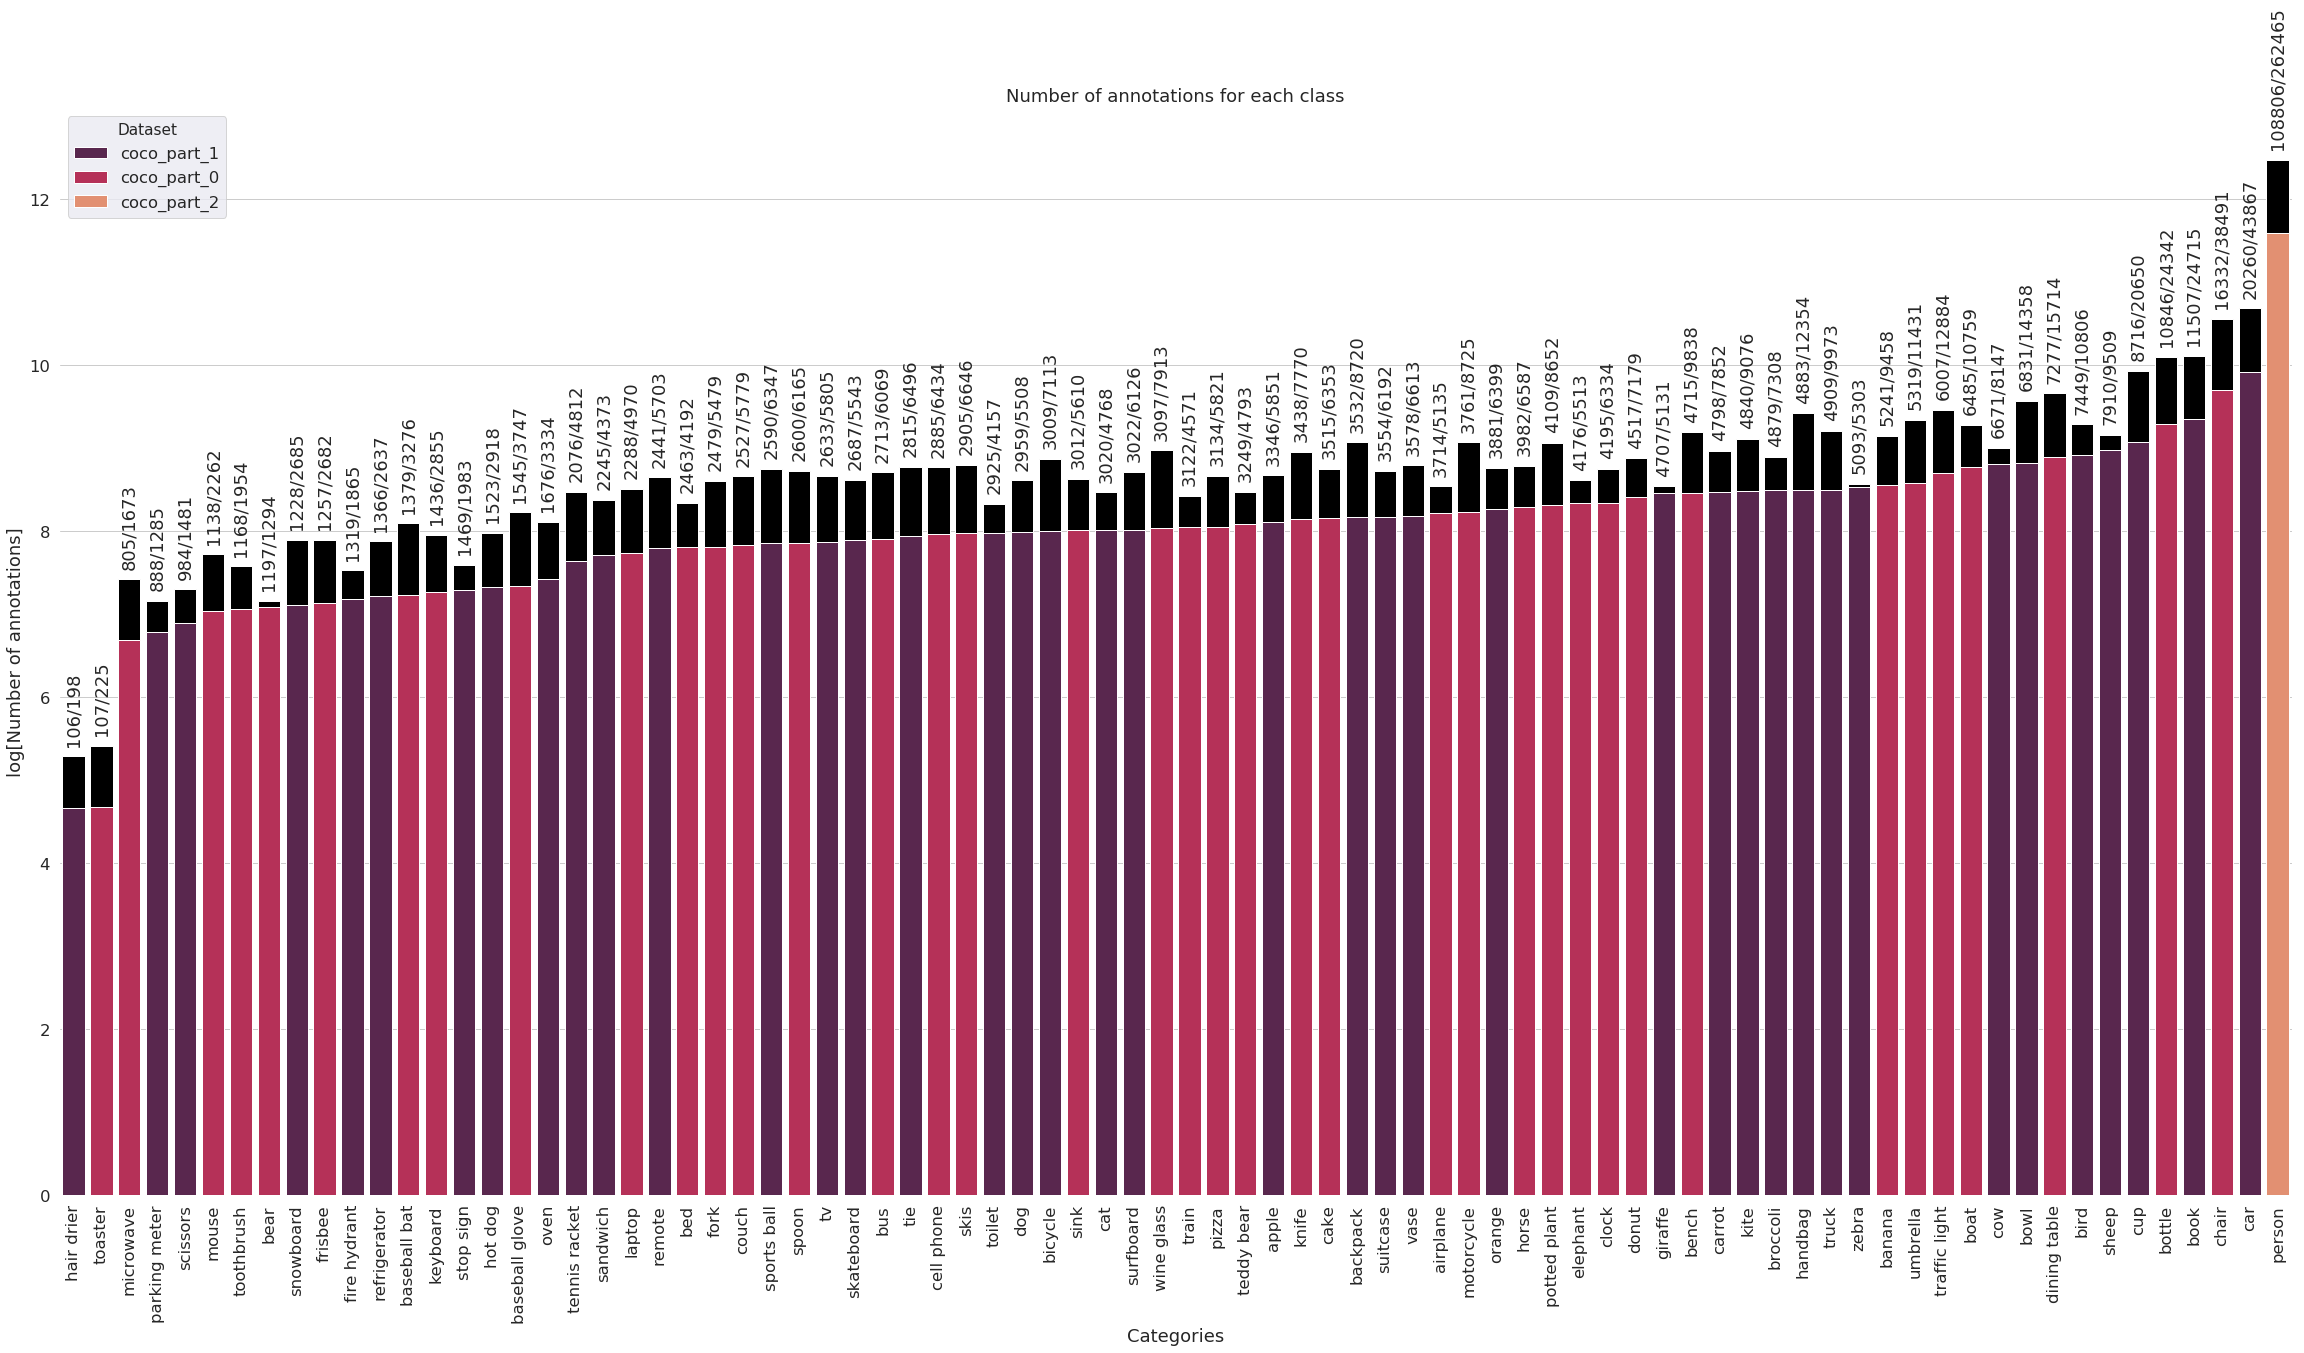

In [34]:
ordered_cats = draw_cats_distribution(all_cats_to_anns_lens,val =False,  ordered_cats=None)

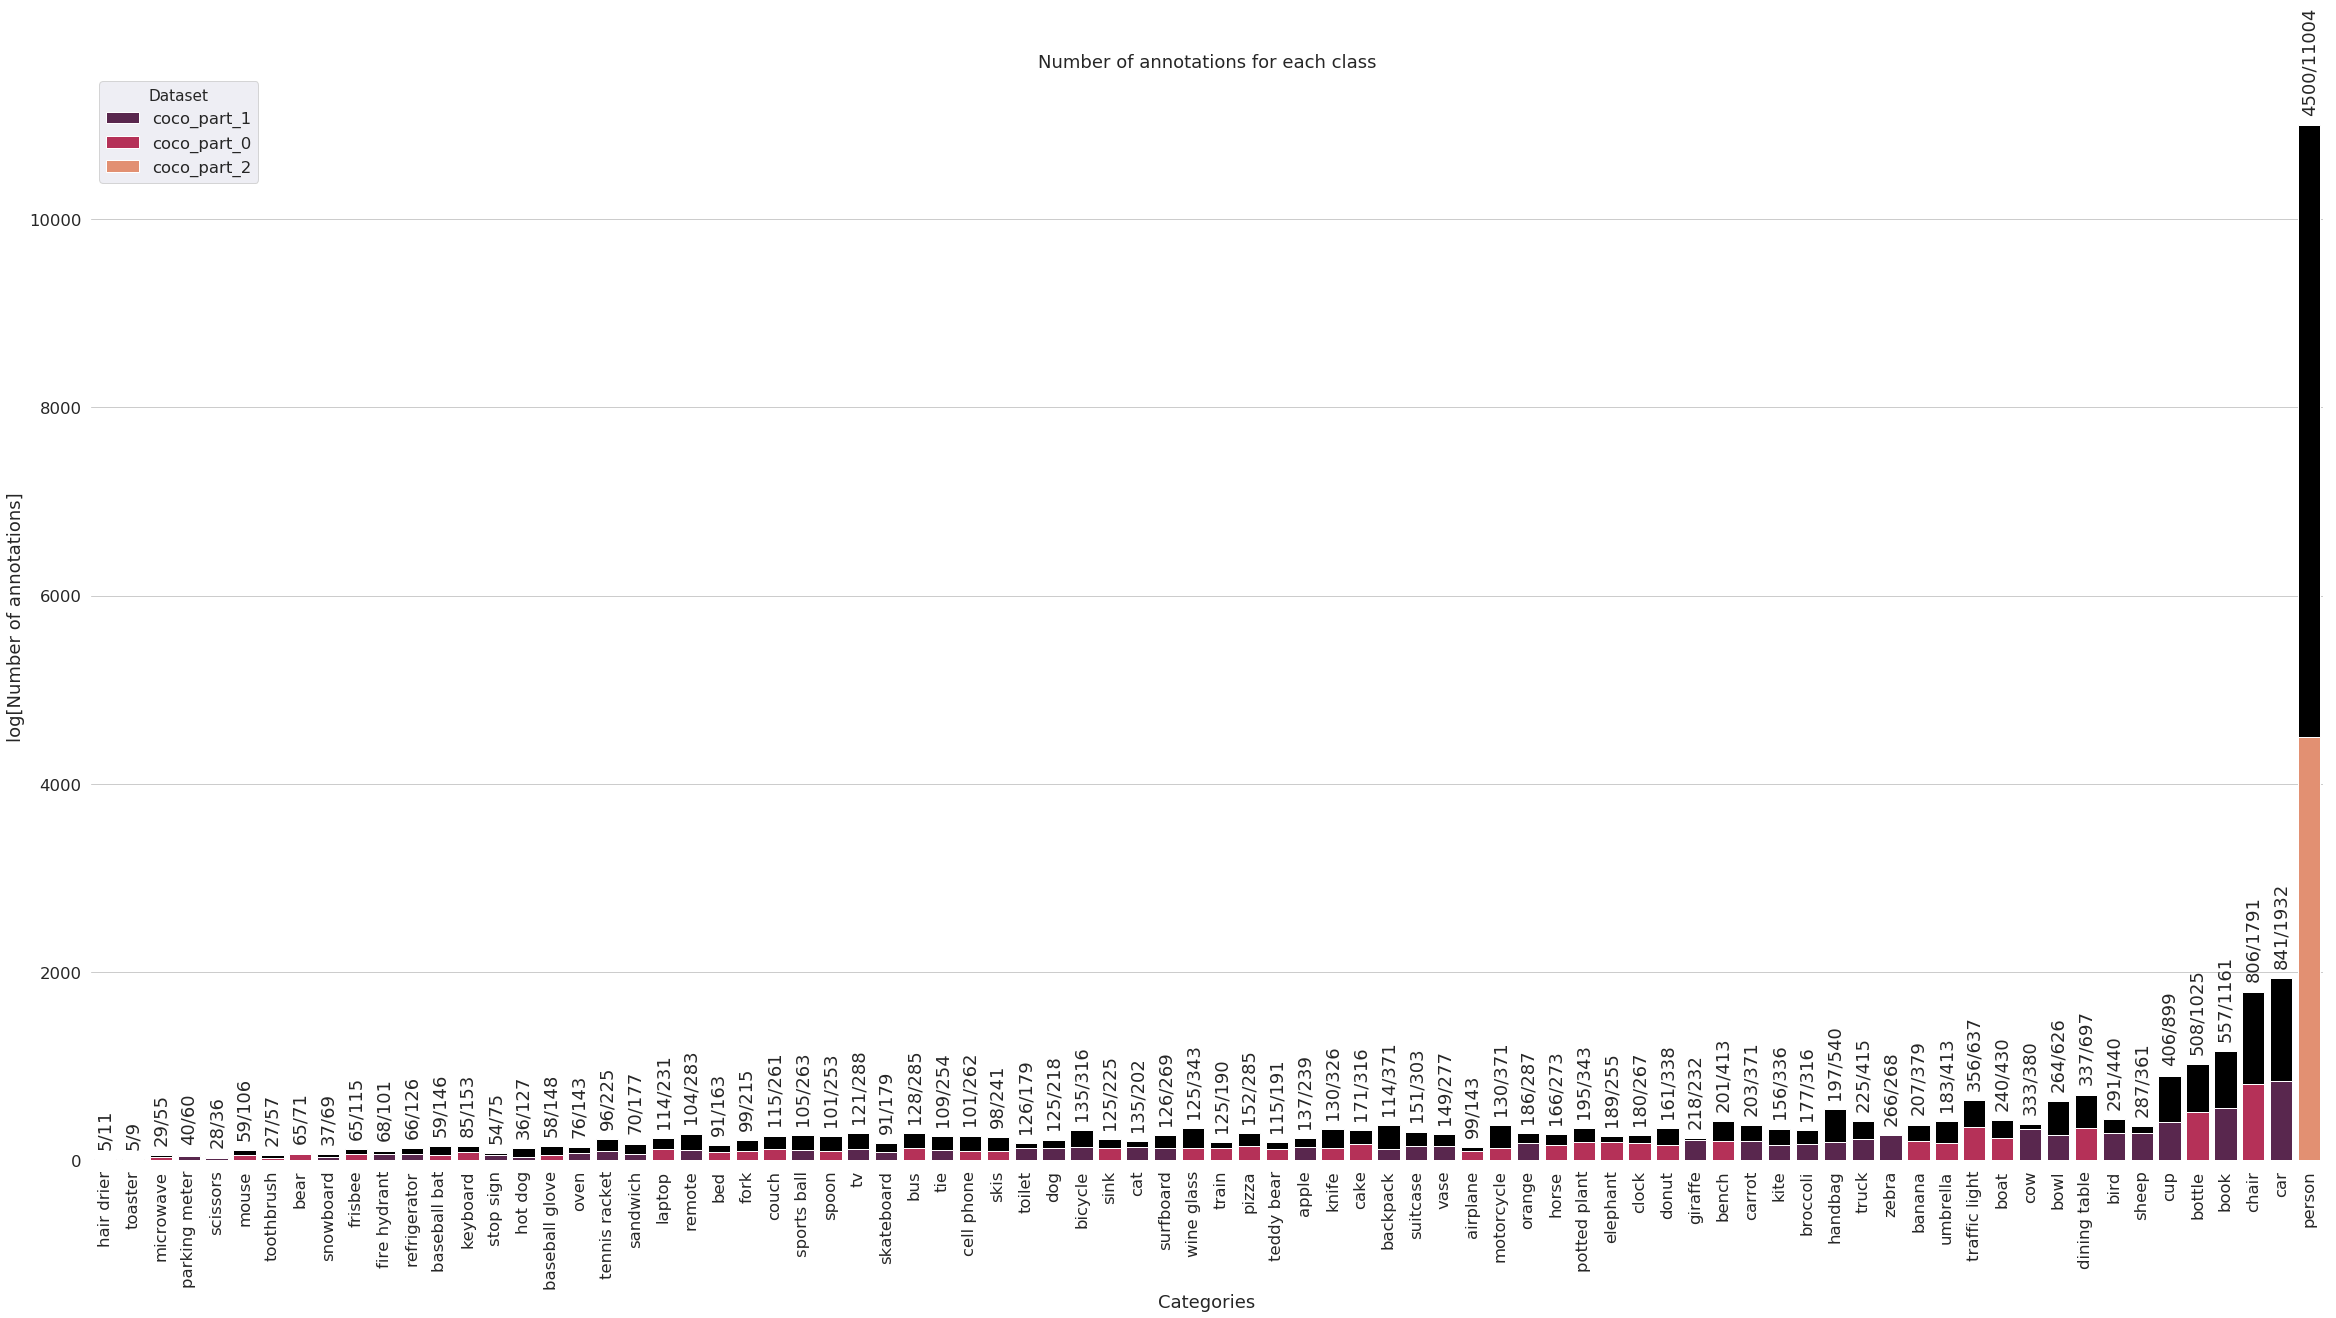

In [39]:
ordered_cats=draw_cats_distribution(val_all_cats_to_anns_lens,val =True,  ordered_cats=ordered_cats)

In [ ]:
df